In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Questão 8

# a)

In [6]:
df = pd.read_csv('College.csv')

Aqui eu usei o método **read_csv()** da lib Pandas para transformar a planilha **College** em um **DataFrame**

# b)

In [7]:
df2 = pd.read_csv('College.csv', index_col = 0)

df3 = df.rename({'Unnamed: 0': 'College'}, axis=1)

df3 = df3.set_index('College')

df = df3

Aqui foi introduzido um problema básico da etapa de **Data Cleaning** que é o de o índice não ter um título adequado. Caso busquemos, em algum momento, utilizar a coluna dos índices não teríamos tanta facilidade. À partir disso, o nosso objetivo é dar um nome para esse coluna e torná-la mais acessível

+ O parâmetro ```index_col = 0``` da linha 1 indica para o Pandas que a primeira coluna do DataFrame deverá ser usada como índice.
+ Após isso, podemos notar que o nome das universidades se tornou o índice, mas ela não tem um nome apropriado, que facilitaria possíveis futuro manuseios
+ Afim de trocar o nome dela de **Unnamed: 0** para college, usamos o método rename ```df.rename({'Unnamed: 0': 'College'}, axis=1)``` para trocar o nome dessa coluna
+ Por fim, usamos o método set_index para tornar essa coluna oficialmente o index

# c)

In [8]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


Aqui utilizamos o método describe que faz operações básicas com cada coluna da planilha, como média, quartiles, valores mínimos e máximos, etc.

# d)

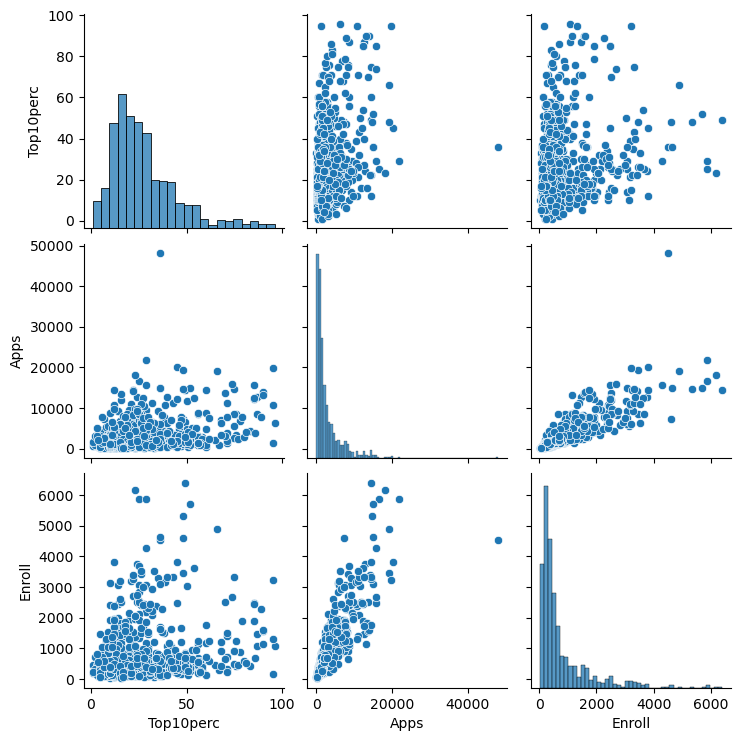

In [9]:
new_df = df[['Top10perc', 'Apps', 'Enroll']]

sns.pairplot(new_df)

Aqui foi criado um **Pairplot** que relaciona as 3 colunas que foram pedidas pelo exercício. Resolvi usar a lib **Seaborn** afim de obter um visual melhor mais facilmente

# e)

<Axes: xlabel='Outstate', ylabel='Private'>

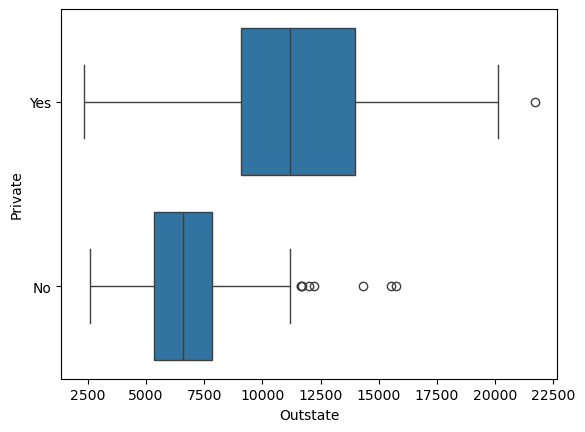

In [10]:
sns.boxplot(data=df, x=df['Outstate'], y=df['Private'])

Aqui o exercício nos manda fazer um boxplot da coluna **Private** em relação a coluna **Outstate**. É possível notar que existe uma forte relação entre o Outstate(que na minha concepção é uma representação do custo dessa universidade) e ela ser privada ou não. Podemos notar que quanto maior o custo, maior a chance dela ser privada, porém não podemos deixar de notar alguns **OutLiers** que indicam que, por mais que a universidade não seja privada, existem algumas com maior custo

# f)

<Axes: xlabel='Outstate', ylabel='Elite'>

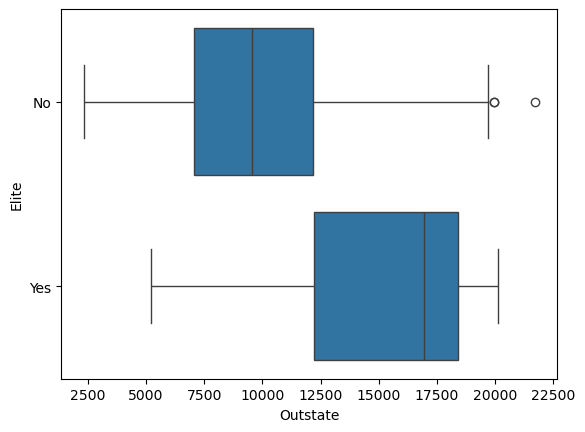

In [34]:
df['Elite'] = pd.cut(df['Top10perc'], bins=[0, 50, 100], labels=['No', 'Yes'])

sns.boxplot(data=df, x=df['Outstate'], y=df['Elite'])

Achei o exercício um pouco confuso por não deixar explícito que o valor de top10perc é uma porcentagem, ou seja, se top10perc é igual a 93, quer dizer que 93% dos alunos dessa universidade eram muito bons nas suas escolas. 

À partir disso o exercício pede para criar um boxplot de Outstate vs Elite aonde:

+ No = Escolas onde **menos** de 50% dos alunos são muito bons
+ Yes = Escolas onde **mais** de 50% dos alunos são muito bons

Deste modo, podemos observar que os alunos de **maior nível** tendem a ir pra escolas **mais caras**. Isso é o esperado, dado que os pais dos alunos bem-sucedidos tendem a querer um melhor ensino pra eles

# g)

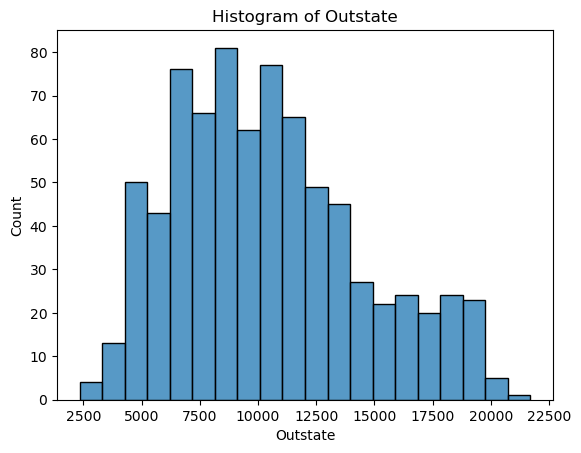

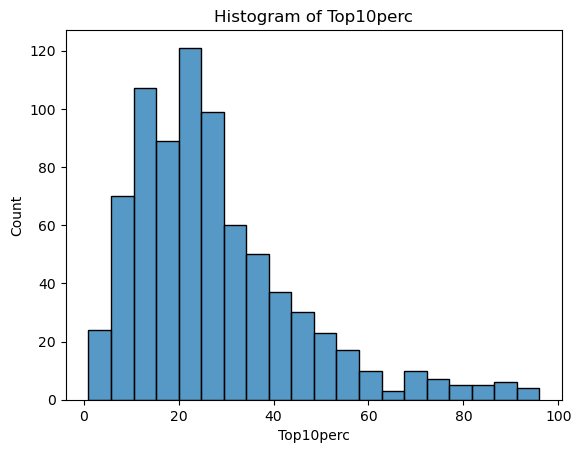

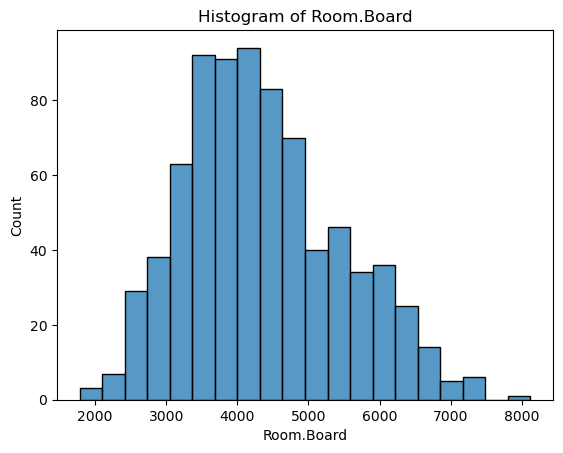

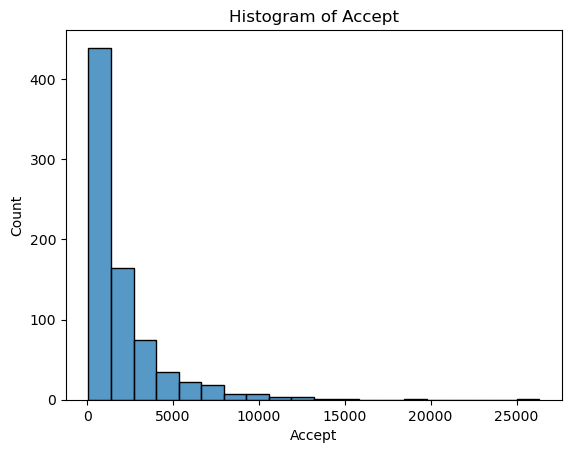

In [57]:
variables = ['Outstate', 'Top10perc', 'Room.Board', 'Accept']

# Loop through each column and plot the histogram
for var in variables:
    sns.histplot(df[var], bins=20)  # Change bins if needed
    plt.title(f'Histogram of {var}')
    plt.show()